<a href="https://colab.research.google.com/github/GODxFATHER/Bike-Sharing-Demand-Prediction/blob/main/Individual_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib --upgrade     # updating matplotlib as we are using bar_label function which is introduced in recent versions(matplotlib >= 3.4.2) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

In [2]:
# 1. Prepare Problem


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

> **1.(a) Load libraries**


In [4]:
# Importing Libraries

#numpy pandas for data manipulation
import numpy as np 
import pandas as pd

#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#not displaying warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from pandas import set_option

#to calculate stats
from scipy import stats
from scipy.stats import norm, skew

# Configuration for matplotlib graphs
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (13, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [65]:
# Importing feature engineering and model training libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, make_scorer
from yellowbrick.model_selection import rfecv, LearningCurve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

> **1.(b) Load dataset**

In [5]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Loading the csv file into pandas dataframe

path_n = "/content/drive/MyDrive/DATA_FILES/SeoulBikeData.csv"
df = pd.read_csv(path_n, encoding= 'unicode_escape')

>  **2. Summarize Data**



> **2.(a) Descriptive statistics**

In [7]:
#head

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
#head

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


**We can see that attributes are on different scale**

**We can use transformations**

In [9]:
#shape

df.shape

(8760, 14)

**We have 8760 rows and 14 feature**

In [10]:
#duplicates 

df.duplicated().sum()

0

  **There are no duplicate rows in dataset**

In [11]:
#Null value check

df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**There are no missing values**

In [12]:
#types

df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

**We can see that 10 attributes are numeric with float and int values and other 4 contain categorical values**

**I should convert 'Date' column to datatime data type**

In [13]:
#converting  'Date' column to datatime data type

df.Date = df.Date.astype('datetime64')

In [14]:
#Extracting new feature from 'Date' column

df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month_name()
df['Weekday'] = df.Date.dt.day_name()

In [15]:
#Droping Date column

df.drop(columns = 'Date', inplace = True)

In [16]:
#description numerical columns

set_option('precision', 1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,7.0e+02,645.0,0.0,191.0,5.0e+02,1065.2,3556.0
Hour,8760.0,1.2e+01,6.9,0.0,5.8,1.2e+01,17.2,23.0
Temperature(°C),8760.0,1.3e+01,11.9,-17.8,3.5,1.4e+01,22.5,39.4
Humidity(%),8760.0,5.8e+01,20.4,0.0,42.0,5.7e+01,74.0,98.0
Wind speed (m/s),8760.0,1.7e+00,1.0,0.0,0.9,1.5e+00,2.3,7.4
Visibility (10m),8760.0,1.4e+03,608.3,27.0,940.0,1.7e+03,2000.0,2000.0
Dew point temperature(°C),8760.0,4.1e+00,13.1,-30.6,-4.7,5.1e+00,14.8,27.2
Solar Radiation (MJ/m2),8760.0,5.7e-01,0.9,0.0,0.0,1.0e-02,0.9,3.5
Rainfall(mm),8760.0,1.5e-01,1.1,0.0,0.0,0.0e+00,0.0,35.0
Snowfall (cm),8760.0,7.5e-02,0.4,0.0,0.0,0.0e+00,0.0,8.8


**We can see**
* **outlier in 'Rented_Bike_Count' column**

* **We have to check outliers and use scaling technique**

In [17]:
#describe categorical columns

df.describe(include=['O']).T

,count,unique,top,freq
Seasons,8760,4,Spring,2208
Holiday,8760,2,No Holiday,8328
Functioning Day,8760,2,Yes,8465
Month,8760,12,January,744
Weekday,8760,7,Sunday,1296


**We can see that**

  * **We have to change dtype of 'Data' column to datetime**
  * **'Seasons',	'Holiday', 'Functioning Day' have 4, 2, 2 unique values**
  * **'Month' and Weekday have 12 and 7 categories**

> **2.(b) Exploratory Data Analysis(Data visualizations)**

> **2.(b).(i) Univaiate Analysis**

> **Dependent Variable**

In [ ]:
# Distribution of dependent variable

plt.figure(figsize=(21,7))

col='Rented Bike Count'       

mean = df['Rented Bike Count'].mean()
median = df['Rented Bike Count'].median()

plt.subplot(1, 2, 1)
sns.distplot(df[col] , fit=norm, kde =True)
plt.axvline(np.median(df[col]),color='g', linestyle='--', label = 'median')
plt.axvline(np.mean(df[col]),color='r', linestyle='--', label = 'mean')  
plt.legend(['continuous probability density curve', 'Normal dist', f'median {median}', f'mean {mean}' ] , loc='best')    
plt.ylabel('Frequency') 
plt.title(f'{col} distribution AND skewness {round(df[col].skew(),2)}')

plt.subplot(1, 2, 2)
sns.boxplot(df[col])
plt.axvline(np.median(df[col]),color='g', linestyle='--')
plt.axvline(np.mean(df[col]),color='r', linestyle='--')  
plt.title('boxplot') 
  
plt.show()

* **The dependent variable is right Skewed**
* **I will apply sq-rt transformation in later stage so it will become normally distributed. It will help us in bettter modeling helping in relationship between target and independent variables. For now let's visualize how the dependent variable will look after transformation.**


In [ ]:
# Distribution of dependent variable

sq = np.sqrt(df["Rented Bike Count"])

myvar = pd.Series(sq)


plt.figure(figsize=(21,7))

col='Rented Bike Count'       

mean = myvar.mean()
median = myvar.median()

plt.subplot(1, 2, 1)
sns.distplot(myvar , fit=norm, kde =True)
plt.axvline(np.median(myvar),color='g', linestyle='--', label = 'median')
plt.axvline(np.mean(myvar),color='r', linestyle='--', label = 'mean')  
plt.legend(['continuous probability density curve', 'Normal dist', f'median {median}', f'mean {mean}' ] , loc='best')    
plt.ylabel('Frequency') 
plt.title(f'{col} distribution AND skewness {round(myvar.skew(),2)}')

plt.subplot(1, 2, 2)
sns.boxplot(myvar)
plt.axvline(np.median(myvar),color='g', linestyle='--')
plt.axvline(np.mean(myvar),color='r', linestyle='--')  
plt.title('boxplot') 
  
plt.show()

**Now the distribution looks closer to normal distribution.**

> **Continous Variable**

In [ ]:
# density plot of numerical columns
#distribution of continuous feature

continuous_features = [ 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
                       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for col in continuous_features:

  plt.figure(figsize=(21,7))

  mean1 = df[col].mean()
  median1 = df[col].median()

  plt.subplot(1, 2, 1)
  sns.distplot(df[col] , fit=norm, kde =True)
  plt.axvline(np.median(df[col]),color='g', linestyle='--', label = 'median')
  plt.axvline(np.mean(df[col]),color='r', linestyle='--', label = 'mean')  
  plt.legend(['continuous probability density curve', 'Normal dist', f'median {median1}', f'mean {mean1}' ] , loc='best')    
  plt.ylabel('Frequency') 
  plt.title(f'{col} distribution AND skewness {round(df[col].skew(),2)}')

  plt.subplot(1, 2, 2)
  sns.boxplot(df[col])
  plt.axvline(np.median(df[col]),color='g', linestyle='--')
  plt.axvline(np.mean(df[col]),color='r', linestyle='--')  
  plt.title('boxplot') 
  
  plt.show()
  print(''' 
    
        ''')

**Insights:**
* Most of the continuous features are skewed due to their inherent values.


Since skewed features are constituted of inherent values, changing their natural distribution is not a good option. On this dataset, robust machine learning models such as Decision Tree, Random Forest, and others would be substantially more efficient than other regression-based models which are sensitive to skewness, although it should be prudent to start with simple models as a baseline.

> **Categorical Variable**

In [ ]:
# Representation of Categorical features

categorical_features = ["Seasons", "Holiday", "Functioning Day"]

for col in categorical_features:
  fig = plt.figure(figsize = (12, 6))
 
  count = df[col].value_counts()
  count_plot = plt.bar(x = count.index, height = count.values, color = "slateblue")
  plt.bar_label(count_plot)

  plt.xlabel(col)
  plt.ylabel("Count")
  plt.title(f"Count of listings present in each {col} group", fontsize = 15, fontweight = "bold")

  plt.show()

**Insights:** 
* All the seasons are equally represented in the data.
* In the dataset, holidays account for only 4.93 per cent of the overall.
* The dataset only has a 3.3 per cent representation of non-functioning days.

Since the data is from the years 2017 and 2018, these representations appear to be accurate within this time period.

> **Cyclical Variable**

In [ ]:
# Representation of Cyclical features

Cyclical_features = ["Hour", "Year", "Month", "Weekday"]
 
for col in Cyclical_features:
  fig = plt.figure(figsize = (12, 6))
 
  count = df[col].value_counts()
  count_plot = plt.bar(x = count.index, height = count.values, color = "slateblue")
  plt.bar_label(count_plot)

  plt.xlabel(col)
  plt.ylabel("Count")
  plt.title(f"Count of listings present in each {col} group", fontsize = 15, fontweight = "bold")

  plt.show()

**Insights:**
 * The majority of the data was collected in 2018.
 * Except for the year, all cyclical features are equally represented.



Within the time of collected data, the representation of cyclical features also appears to be true.

> **2.(b).(i) Bivariate Analysis**

> **1. Relation between Continuous variables and Dependent variable**

In [ ]:
# Visualising the relation between bike count and continuous variables

for col in continuous_features:
  fig = plt.figure(figsize = (12, 6))
  sns.regplot(x = df[col] ,y = df['Rented Bike Count'] , line_kws={"color": "red"}, scatter_kws={'alpha':0.3})
  plt.title("Rented Bike Count vs " + col)


**Insights**

* Most features are in positive linear relationship with dependent variable except 'Snowfall',  'Rainfall' and 'Humidity'

* Humidity, rainfall, and snowfall have a negative linear relationship with dependent variable.

It appears that continuous features have a linear relationship to rented bike count, I can use Linear Regression to create a simple baseline model to get a head start.

> **2. Relation between Categorical variables and Dependent variable**



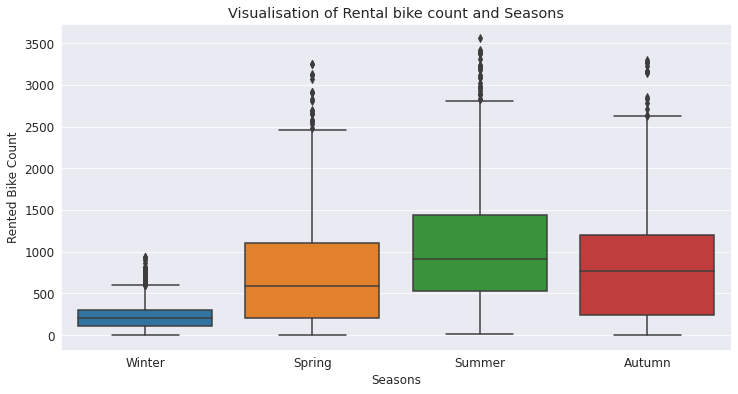

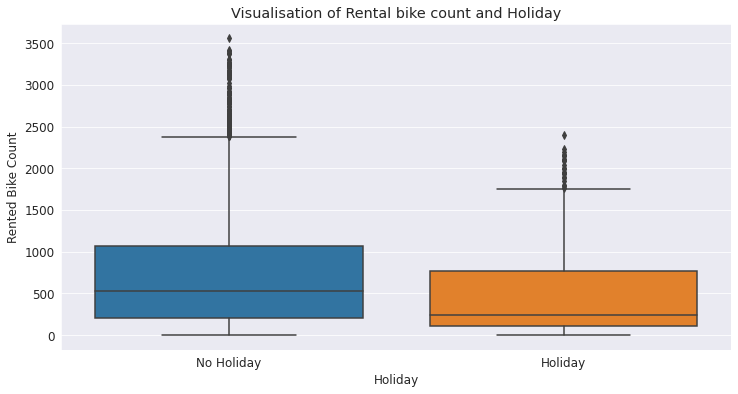

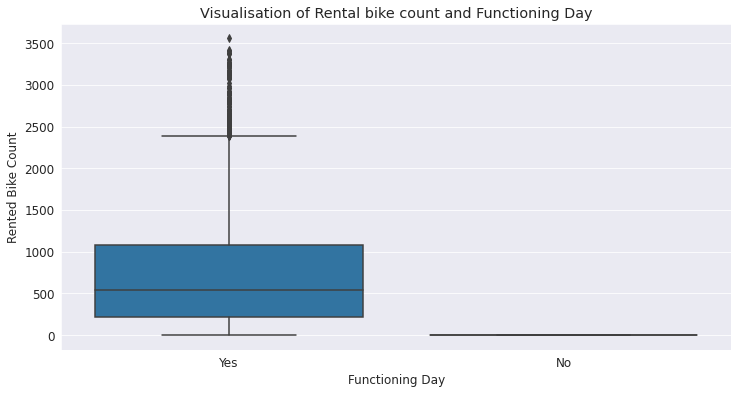

In [42]:
# Visualising the relation between rented bike count and categorical variables

for col in categorical_features:
  fig = plt.figure(figsize = (12, 6))
  ax = fig.gca()
  feature = df[col]
  label = df["Rented Bike Count"]
  sns.boxplot(x = feature, y = label)
  ax.set_title("Visualisation of Rental bike count and " + col)
  
plt.show()

**Insights:**

* In the summer and autumn, there is a large demand for bicycles, however in the winter, there is low demand.
* During the holidays, there is very little demand for bikes.
* On non-working days, bike demand is basically non-existent.
* There is a significant overlap in the distribution of sub-categories of Seasons and Holiday variables.

The distribution of these overlapped sub-categories in categorical features like Seasons and Holidays indicates that these sub-categories might be less useful for the models. I will, however, leave it up to our models to select which features are appropriate for them.

> **2. Relation between Cyclical variables and Dependent variable**

In [46]:
Cyclical_features

['Hour', 'Year', 'Month', 'Weekday']

Text(0.5, 1.0, 'Visualisation of Rental bike count and Month')

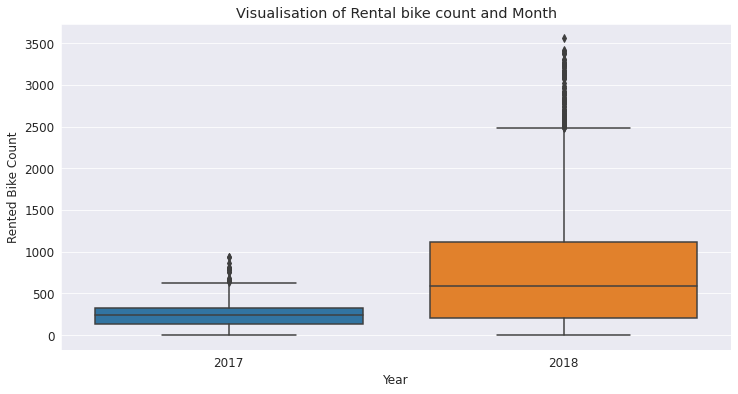

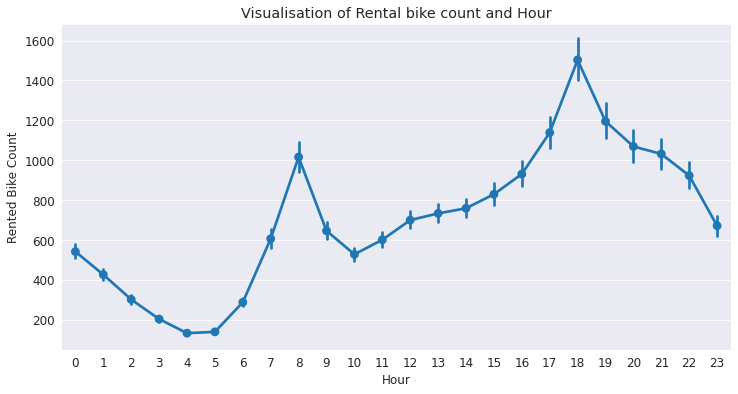

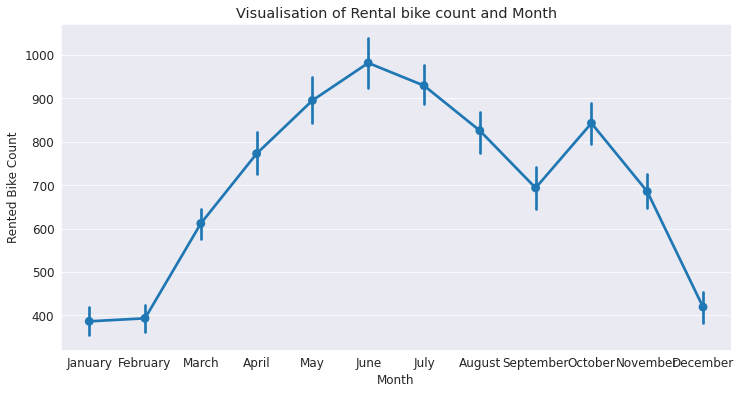

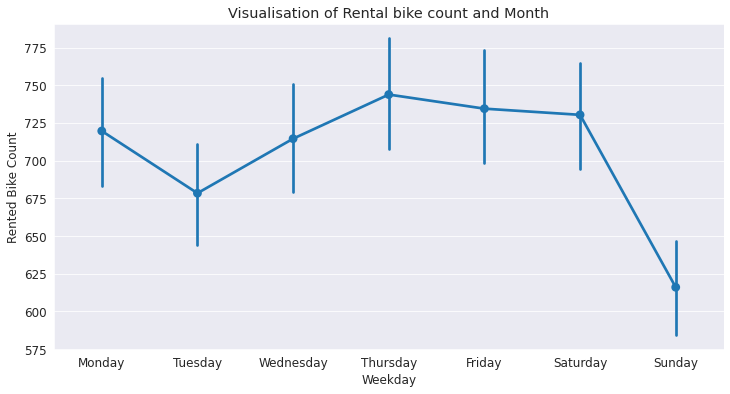

In [54]:
# Visualising the relation between rented bike count and Cyclical variables

# months_order = ["January", "February", "March", "April", "May", "June", "July", 
#                 "August", "September", "October", "November", "December"]
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig = plt.figure(figsize = (12, 6))
ax = fig.gca()
feature = df[ 'Year']
label = df["Rented Bike Count"]
sns.boxplot(x = feature, y = label)
ax.set_title("Visualisation of Rental bike count and " + col)

for col in ['Hour', 'Month']:
  fig = plt.figure(figsize = (12, 6))
  ax = fig.gca()
  feature = df[ col]
  label = df["Rented Bike Count"]
  sns.pointplot(x = feature, y = label)
  ax.set_title("Visualisation of Rental bike count and " + col)

fig = plt.figure(figsize = (12, 6))
ax = fig.gca()
feature = df['Weekday']
label = df["Rented Bike Count"]
sns.pointplot(x = feature, y = label, order = days_order)
ax.set_title("Visualisation of Rental bike count and " + col)

**Insights:**

* There is a noticeable increase in the number of rented bikes in the 8th and 18th hour of the day.
* When compared to 2017, the number of shared bikes on the road climbed dramatically in 2018.
* In the months of May, June, and July, there is a larger demand for bicycles.
* The demand for bicycles is highest on Thursdays and Fridays, and lowest on Sundays.



The cyclical features appear to have a significant impact on the rented bike count.

> **Multivariate Analysis**

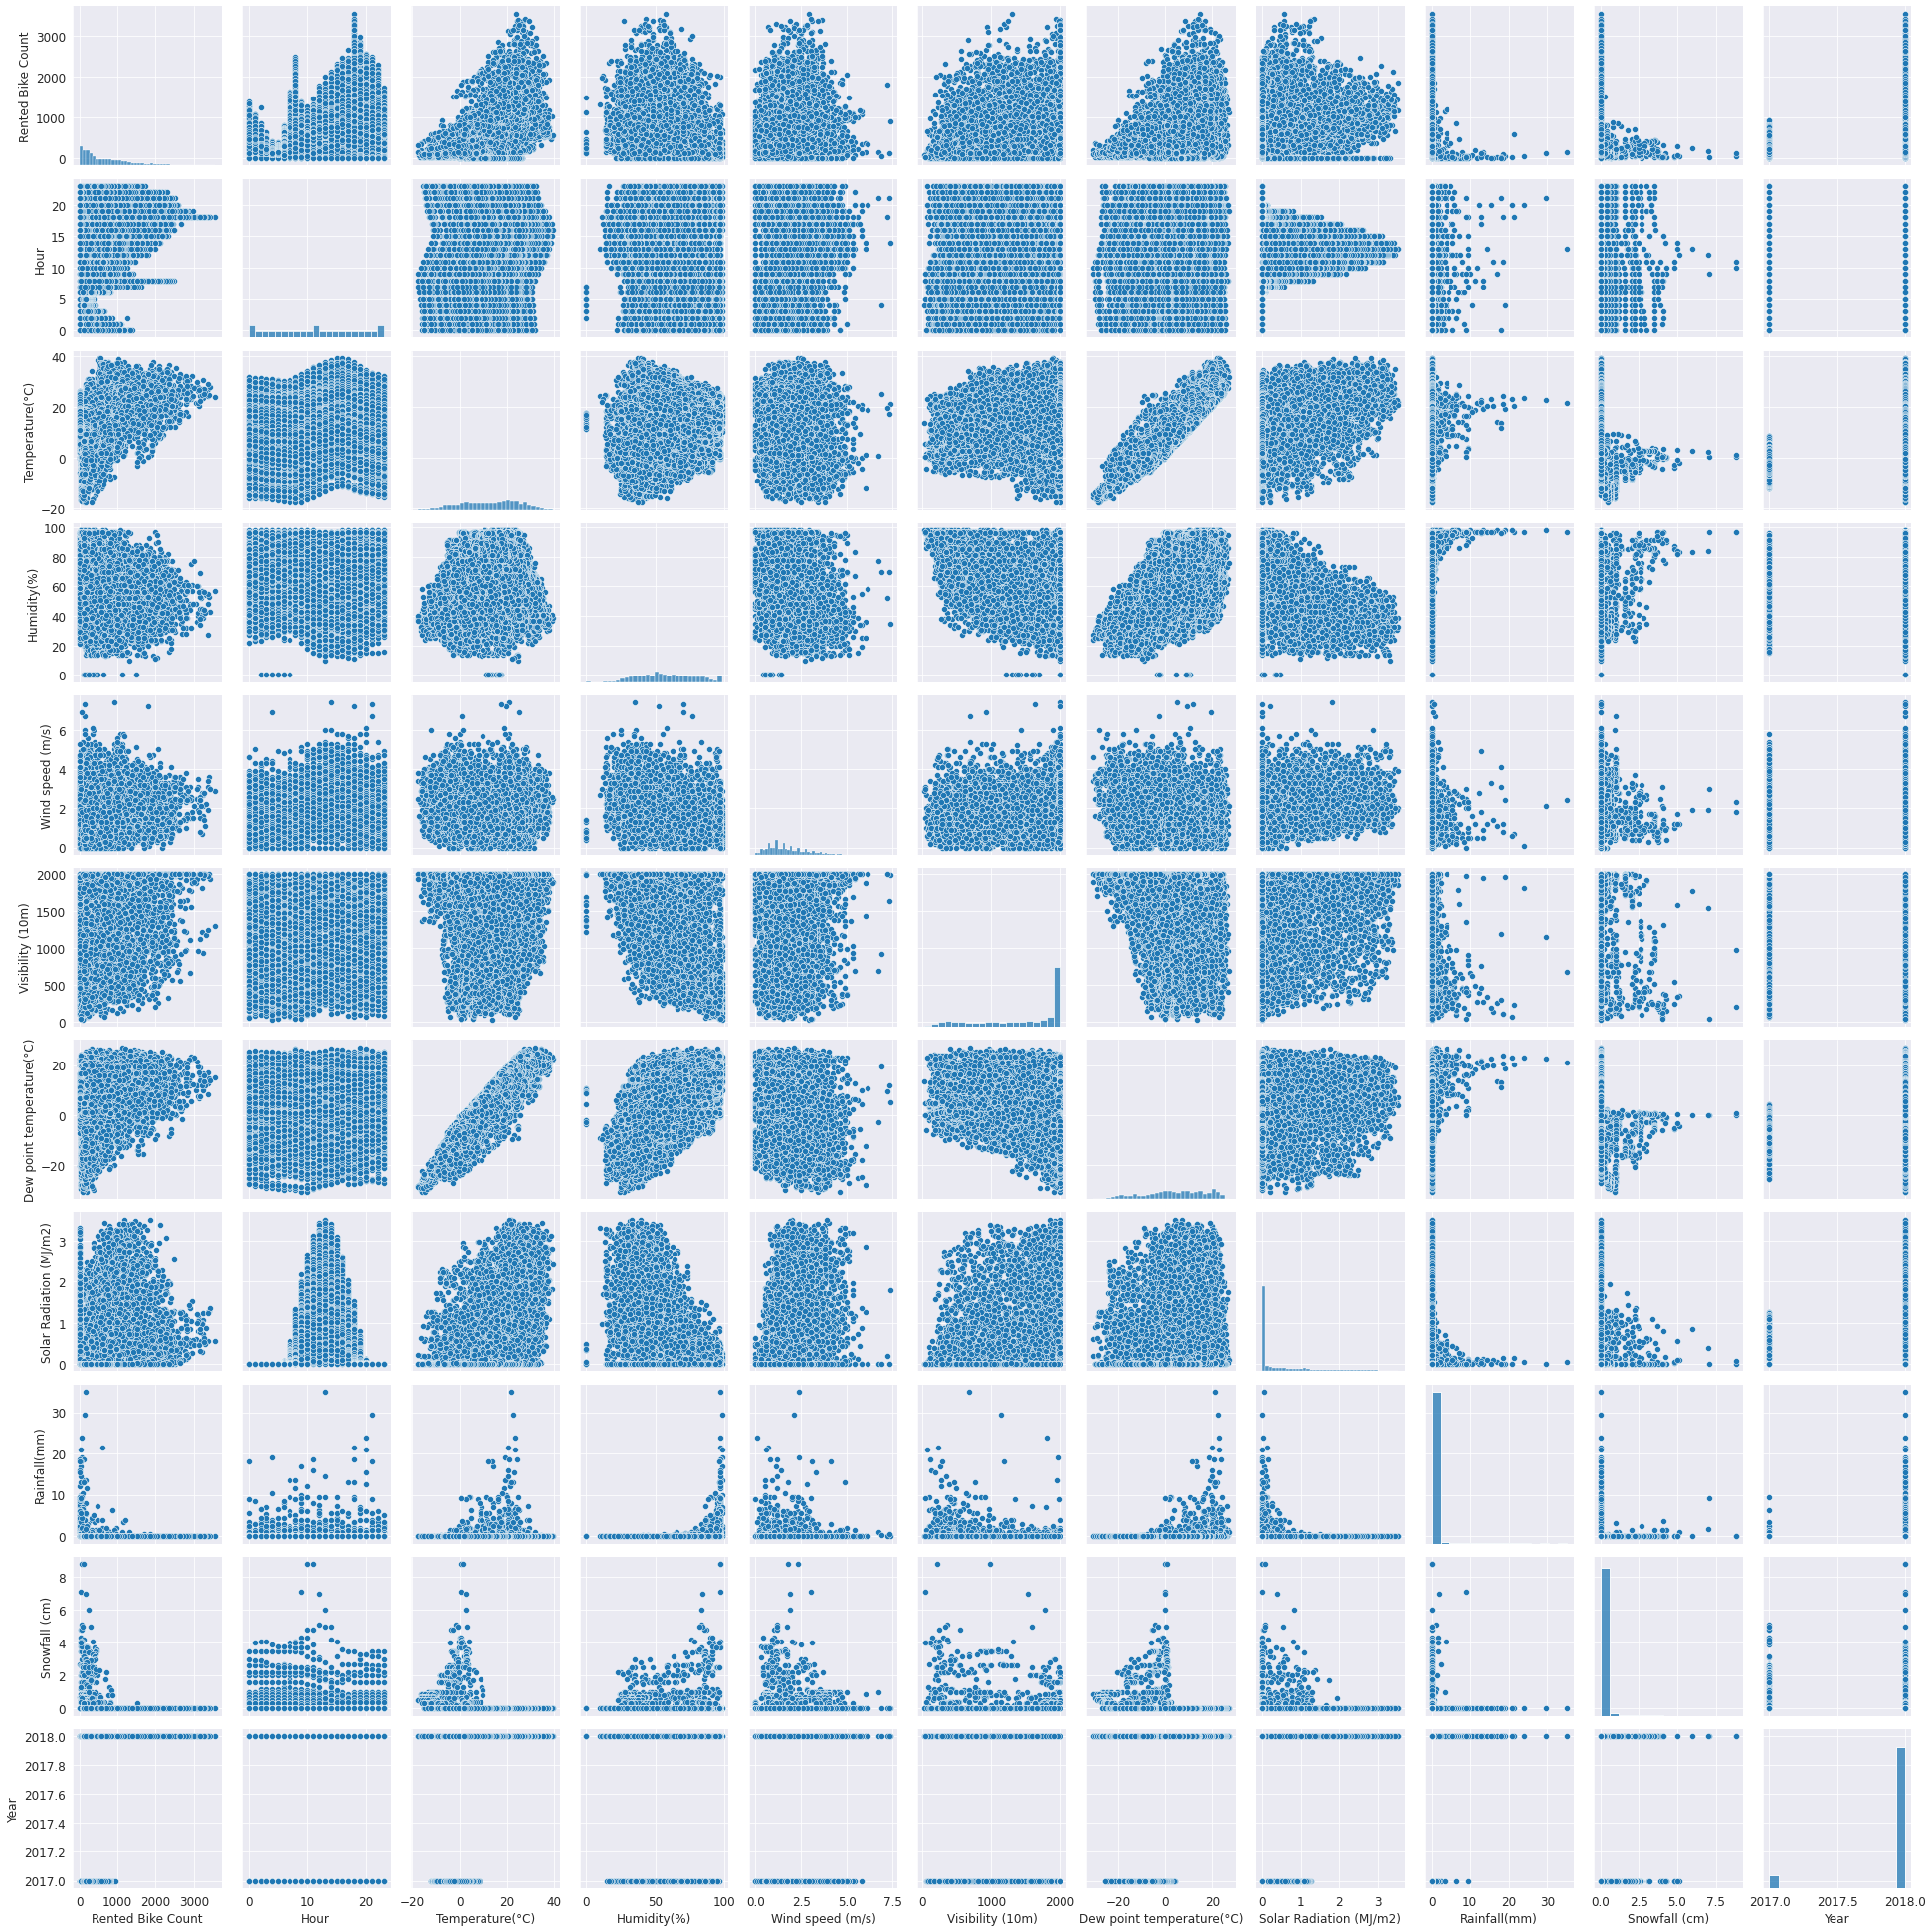

In [63]:
#pairplot

sns.pairplot(df )#, hue = df["Rented Bike Count"] )


**Insights**

* All features are linear relationship with dependent variable

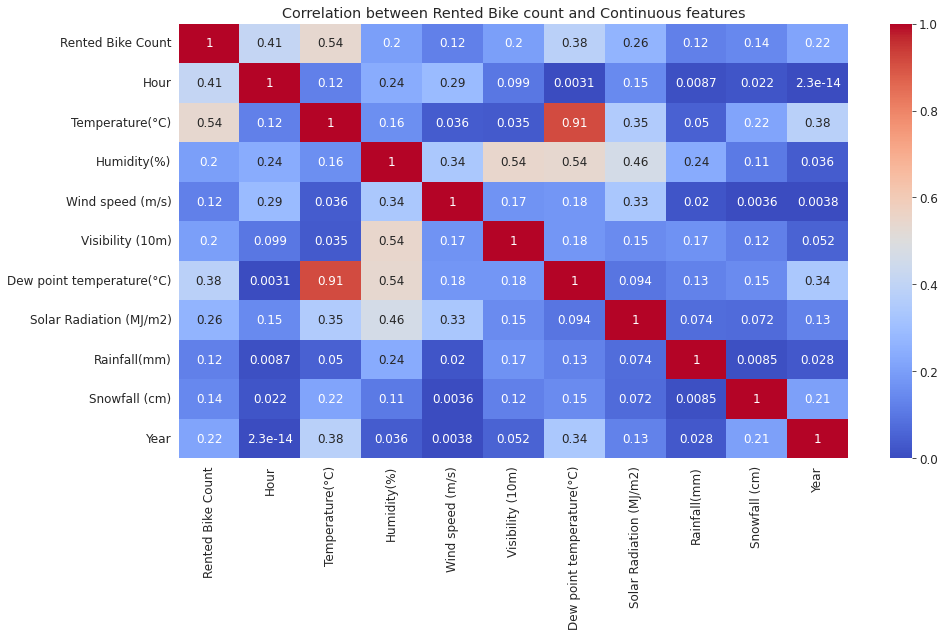

In [55]:
# Correlation matrix

plt.figure(figsize = (15, 8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")
plt.title("Correlation between Rented Bike count and Continuous features")

plt.show()

**Insights:**

* The number of rental bikes is highly correlated with hour and temperature.
* Multicollinearity appears to exist in the data.

Although all continuous features appear to have a linear relationship with the dependent variable, only a few appear to be strongly correlated.



> **Checking Multicollinearity**

In [66]:
# Using VIF to detect multicollinearity

def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

In [67]:
cal_vif(df[[i for i in df.describe().columns if i not in ["Rented Bike Count"]]])


,variables,VIF
0,Hour,4.5
1,Temperature(°C),188.5
2,Humidity(%),186.9
3,Wind speed (m/s),4.8
4,Visibility (10m),10.3
5,Dew point temperature(°C),127.0
6,Solar Radiation (MJ/m2),2.9
7,Rainfall(mm),1.1
8,Snowfall (cm),1.1
9,Year,397.8


Dew Point temperature and Year are highly correlated features. Therefore, I will drop both the features.



In [69]:
cal_vif(df[[i for i in df.describe().columns if i not in ["Rented Bike Count",'Year','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,3.9
1,Temperature(°C),3.2
2,Humidity(%),4.9
3,Wind speed (m/s),4.6
4,Visibility (10m),4.7
5,Solar Radiation (MJ/m2),2.2
6,Rainfall(mm),1.1
7,Snowfall (cm),1.1


In [ ]:
# 3. Prepare Data


In [ ]:
# a) Data Cleaning


In [ ]:
# b) Feature Selection


In [ ]:
# c) Data Transforms


In [ ]:
# 4. Evaluate Algorithms


In [ ]:
# a) Split-out validation dataset


In [ ]:
# b) Test options and evaluation metric


In [ ]:
# c) Spot Check Algorithms


In [ ]:
# d) Compare Algorithms


In [ ]:
# 5. Improve Accuracy


In [ ]:
# a) Algorithm Tuning


In [ ]:
# b) Ensembles


In [ ]:
# 6. Finalize Model


In [ ]:
# a) Predictions on validation dataset


In [ ]:
# b) Create standalone model on entire training dataset


In [ ]:
# c) Save model for later use